## (original)Python statistics essential training - 4.5 p values and confidence

In [1]:
import math
import io

In [16]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [43]:
poll = pd.read_csv('data/poll.csv')

In [44]:
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
vote    1000 non-null object
dtypes: object(1)
memory usage: 7.9+ KB


In [6]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

* Brown had a seeming majority of votes, the null hypothesis here will be that Green wins or ties the election, so the true Brown fraction would be 0.50 or less. 
* we need to find out whether a Brown proportion of 0.511 is an extreme result if the null hypothesis holds.
* so we compute the sampling distribution of the proportion, under a true Brown fraction of 0.50.
* if it's lower than that, the P value will be even lower, so we can work with 0.50.
* below is a function to simulate the sample of a thousand.

In [27]:
# using numpy random rand
# numpy where 
def sample(brown, n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown,'Brown','Green')})

In [31]:
dist = pd.DataFrame({'Brown': [sample(0.50,1000).vote.value_counts(normalize=True)['Brown'] for i in range(10000)]})
# we choose sample size as 1000 because the poll.csv contains 1000 vaotes.

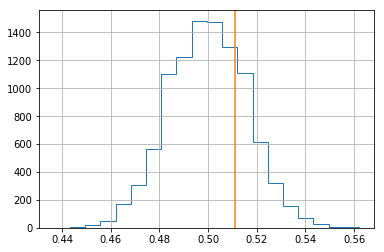

In [34]:
dist.Brown.hist(histtype='step',bins=20)
pp.axvline(0.511,c='C1')

* We see that indeed 0.511 is not a very extreme value.
* below, we look for its quantile

In [36]:
100 - scipy.stats.percentileofscore(dist.Brown,0.511)

23.995000000000005

* The corresponding P value is certainly not enough to reject the null hypothesis that Green ties or wins.

* Do the same with the larger sample 

In [37]:
largepoll = pd.read_csv('data/poll-larger.csv')

In [40]:
largepoll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
vote    10000 non-null object
dtypes: object(1)
memory usage: 78.2+ KB


In [38]:
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64

* Here make a null hypothesis that Brown will win the election since Green seems to have the majority.
* In fact, a nice feature of binary problems, such as this, its the null hypothesis and its alternative are complementary(互补）.

In [41]:
dist = pd.DataFrame({'Green': [sample(0.50,10000).vote.value_counts(normalize=True)['Green'] for i in range(1000)]})
# we select sample size 10000 here because the largepoll.csv contains 10000 votes

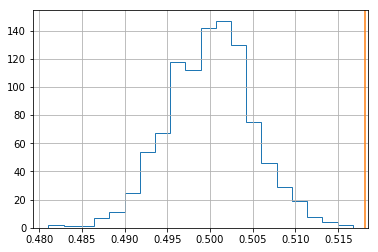

In [42]:
dist.Green.hist(histtype='step',bins=20)
pp.axvline(0.5181,c='C1')

* Here, the value is so extreme that it's not in our finite sampling distribution, we conclude that the P value for rejecting the null hypothesis that Brown wins or ties is one over 1000 or less, which qualifies as very significant.
* An intersting question is that whether one can apply bootstrapping to compute the values. It is all trivial, because bootstrapping can only represent the true distribution, not the distribution under the null hypothesis, so we would need to modify the bootstrap values to be appropriate for the null case, which in some cases is straightforward and not as impossible. Certainly, it requires some thinking and problem specific information.